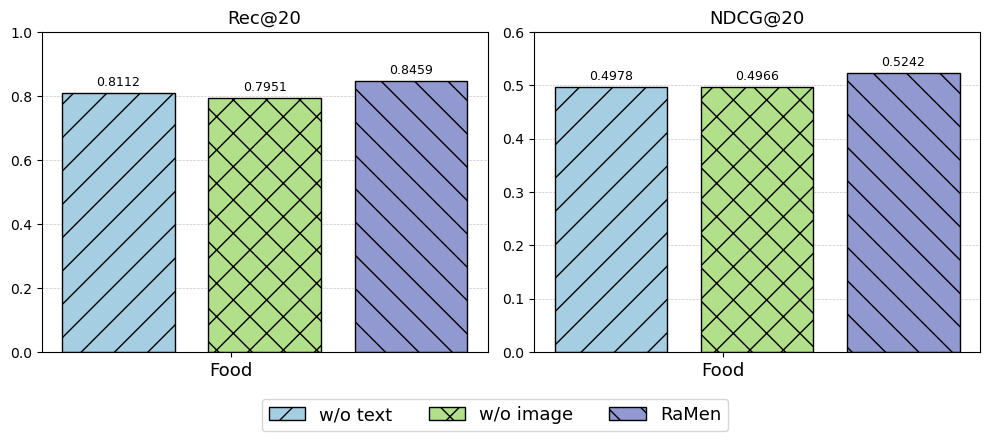

In [95]:
import matplotlib.pyplot as plt
import numpy as np

dataset_name = 'Food'
# datasets = ['Baby', 'Sports', 'Clothing']
# datasets = ['Pog', 'Spotify']
# datasets = ['Pog']
# datasets = ['Spotify']
# datasets = ['Electronic'] 
datasets = [dataset_name]
categories = ['w/o text', 'w/o image', 'RaMen']

# values_recall = {
#     'Baby': [0.0417, 0.0591, 0.0771],
#     'Sports': [0.0544, 0.1041, 0.1152],
#     'Clothing': [0.0861, 0.1331, 0.1501]
# }
# values_ndcg = {
#     'Baby': [0.0195 , 0.0279, 0.0363],
#     'Clothing': [0.0394, 0.0661, 0.0729],
#     'Sports': [0.0266, 0.0513, 0.0574]
# }

# pog 
values_recall_pog = {
    'Pog': [0.0293, 0.0332, 0.0375]
}
values_ndcg_pog = {
    'Pog': [0.0195 , 0.0279, 0.0363]
}

# spotify 
values_recall_spotify = {
    # w/o text, w/o image, full model
    'Spotify': [0.1055, 0.1041, 0.1091]
}
values_ndcg_spotify = {
    'Spotify': [0.1830, 0.1806, 0.1882]
}

# electronic 
values_recall_electronic = {
    'Electronic': [0.7516, 0.7383, 0.8371]
}
values_ndcg_electronic = {
    'Electronic': [0.4936, 0.4656, 0.5373]
}

# food 
values_recall_food = {
    'Food': [0.8112, 0.7951, 0.8459]
}
values_ndcg_food = {
    'Food': [0.4978, 0.4966, 0.5242]
}




all_recall = {
    'Pog': values_recall_pog,
    'Spotify': values_recall_spotify,
    'Electronic': values_recall_electronic, 
    'Food': values_recall_food
}

all_ndcg = {
    'Pog': values_ndcg_pog,
    'Spotify': values_ndcg_spotify,
    'Electronic': values_ndcg_electronic,
    'Food': values_ndcg_food
}

values_recall = all_recall[datasets[0]]
values_ndcg = all_ndcg[datasets[0]]


# Thiết lập vị trí cột
x = np.arange(len(datasets))
width = 0.2  # Độ rộng của cột
spacing = 0.06 # Khoảng cách giữa các cột trong một nhóm

# Vẽ biểu đồ Recall
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
offset = -((len(categories) - 1) * (width + spacing*0) / 2)
rects_recall = []
rects_ndcg = []
# colors = ['#A6CEE3', '#B2DF8A', '#FDBF6F']  # Màu pastel dịu mắt
colors = ['#A6CEE3', '#B2DF8A', '#9299d1']  
hatch_patterns = ['/', 'x', '\\']  # Hoa văn sọc/carô

for i, category in enumerate(categories):
    values_list_recall = [values_recall[dataset][i] for dataset in datasets]
    rects_recall.append(ax1.bar(x + offset + i * (width + spacing), values_list_recall, width, label=category, color=colors[i], hatch=hatch_patterns[i], edgecolor='black'))
    
    values_list_ndcg = [values_ndcg[dataset][i] for dataset in datasets]
    rects_ndcg.append(ax2.bar(x + offset + i * (width + spacing), values_list_ndcg, width, label=category, color=colors[i], hatch=hatch_patterns[i], edgecolor='black'))

# Kẻ đường ngang ở background
ax1.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1.set_axisbelow(True)
ax2.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax2.set_axisbelow(True)

# Gán nhãn và tiêu đề
# ax1.set_ylabel('R@20', fontsize=12)
ax1.set_title('Rec@20', fontsize=13)
ax1.set_xticks(x)

if dataset_name == "Pog":
    ax1.set_ylim(0, 0.045)
if dataset_name == 'Spotify':
    ax1.set_ylim(0, 0.13)
if dataset_name == 'Electronic':
    ax1.set_ylim(0, 1)
if dataset_name == 'Food':
    ax1.set_ylim(0, 1)


ax1.set_xticklabels(datasets, fontsize=13)
# ax1.legend(loc="center", title="", fontsize=13, bbox_to_anchor=(0.5, -0.2), ncol=3)
# ax1.set_xlabel('a)')

# ax2.set_ylabel('NDCG@20', fontsize=12)
ax2.set_title('NDCG@20', fontsize=13)
ax2.set_xticks(x)

if dataset_name == "Pog":
    ax2.set_ylim(0, 0.042)
if dataset_name == "Spotify":
    ax2.set_ylim(0, 0.22)
if dataset_name == 'Electronic':
    ax2.set_ylim(0, 0.6)
if dataset_name == 'Food':
    ax2.set_ylim(0, 0.6)

ax2.set_xticklabels(datasets, fontsize=13)
# ax2.legend(title="", fontsize=13)
# ax2.set_xlabel('b)')


# set legend for fig 
fig.legend(categories, loc="center", title="", fontsize=13, bbox_to_anchor=(0.5, -0.05), ncol=3)

# Hiển thị giá trị trên cột
for rect_group in rects_recall:
    for rect in rect_group:
        height = rect.get_height()
        ax1.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Dịch chuyển text lên trên
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

for rect_group in rects_ndcg:
    for rect in rect_group:
        height = rect.get_height()
        ax2.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Dịch chuyển text lên trên
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('./pog_modality.pdf')
plt.show()

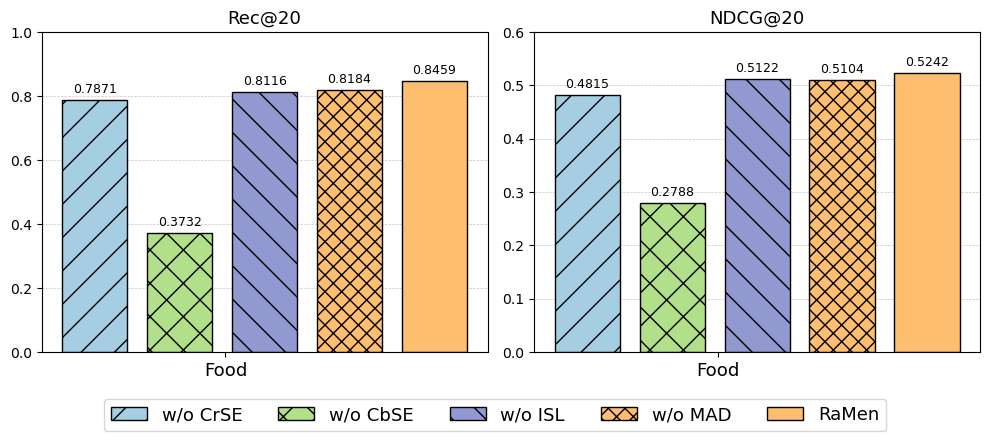

In [99]:
import matplotlib.pyplot as plt
import numpy as np

dataset_name = 'Food'
# datasets = ['Baby', 'Sports', 'Clothing']
# datasets = ['Pog', 'Spotify']
# datasets = ['Pog']
# datasets = ['Spotify']
# datasets = ['Electronic'] 
datasets = [dataset_name]

# categories = ['w/o text', 'w/o image', 'RaMen']
categories = ['w/o CrSE', 'w/o CbSE', 'w/o ISL', 'w/o MAD', 'RaMen']

# values_recall = {
#     'Baby': [0.0417, 0.0591, 0.0771],
#     'Sports': [0.0544, 0.1041, 0.1152],
#     'Clothing': [0.0861, 0.1331, 0.1501]
# }
# values_ndcg = {
#     'Baby': [0.0195 , 0.0279, 0.0363],
#     'Clothing': [0.0394, 0.0661, 0.0729],
#     'Sports': [0.0266, 0.0513, 0.0574]
# }

# pog 
values_recall_pog = {
    # 'w/o CrSE', 'w/o CbSE', 'w/o ISL', 'w/o MAD'
    'Pog': [0.0218, 0.0301, 0.0335, 0.0348, 0.0375]
}
values_ndcg_pog = {
    'Pog': [0.0119, 0.0209, 0.0202, 0.0210, 0.0226]
}

# spotify 
values_recall_spotify = {
    # w/o text, w/o image, full model
    'Spotify': [0.1028, 0.0995, 0.1071, 0.1080, 0.1091]
}
values_ndcg_spotify = {
    'Spotify': [0.1772, 0.1662, 0.1863, 0.1838, 0.1882]
}

# electronic 
values_recall_electronic = {
    'Electronic': [0.7376, 0.3560, 0.8081, 0.7836, 0.8371]
}
values_ndcg_electronic = {
    'Electronic': [0.4780, 0.2595, 0.5253, 0.5035, 0.5373]
}

# food 
values_recall_food = {
    'Food': [0.7871, 0.3732, 0.8116, 0.8184, 0.8459]
}
values_ndcg_food = {
    'Food': [0.4815, 0.2788, 0.5122, 0.5104, 0.5242]
}




all_recall = {
    'Pog': values_recall_pog,
    'Spotify': values_recall_spotify,
    'Electronic': values_recall_electronic, 
    'Food': values_recall_food
}

all_ndcg = {
    'Pog': values_ndcg_pog,
    'Spotify': values_ndcg_spotify,
    'Electronic': values_ndcg_electronic,
    'Food': values_ndcg_food
}

values_recall = all_recall[datasets[0]]
values_ndcg = all_ndcg[datasets[0]]


# Thiết lập vị trí cột
x = np.arange(len(datasets))
width = 0.2  # Độ rộng của cột
spacing = 0.06 # Khoảng cách giữa các cột trong một nhóm

# Vẽ biểu đồ Recall
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
offset = -((len(categories) - 1) * (width + spacing*0) / 2)
rects_recall = []
rects_ndcg = []
# colors = ['#A6CEE3', '#B2DF8A', '#FDBF6F']  # Màu pastel dịu mắt
colors = ['#A6CEE3', '#B2DF8A', '#9299d1', '#FDBF6F', '#FDBF6F']  
hatch_patterns = ['/', 'x', '\\', 'xx', '']  # Hoa văn sọc/carô

for i, category in enumerate(categories):
    values_list_recall = [values_recall[dataset][i] for dataset in datasets]
    rects_recall.append(ax1.bar(x + offset + i * (width + spacing), values_list_recall, width, label=category, color=colors[i], hatch=hatch_patterns[i], edgecolor='black'))
    
    values_list_ndcg = [values_ndcg[dataset][i] for dataset in datasets]
    rects_ndcg.append(ax2.bar(x + offset + i * (width + spacing), values_list_ndcg, width, label=category, color=colors[i], hatch=hatch_patterns[i], edgecolor='black'))

# Kẻ đường ngang ở background
ax1.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1.set_axisbelow(True)
ax2.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax2.set_axisbelow(True)

# Gán nhãn và tiêu đề
# ax1.set_ylabel('R@20', fontsize=12)
ax1.set_title('Rec@20', fontsize=13)
ax1.set_xticks(x)

if dataset_name == "Pog":
    ax1.set_ylim(0, 0.045)
if dataset_name == 'Spotify':
    ax1.set_ylim(0, 0.13)
if dataset_name == 'Electronic':
    ax1.set_ylim(0, 1)
if dataset_name == 'Food':
    ax1.set_ylim(0, 1)


ax1.set_xticklabels(datasets, fontsize=13)
# ax1.legend(loc="center", title="", fontsize=13, bbox_to_anchor=(0.5, -0.2), ncol=3)
# ax1.set_xlabel('a)')

# ax2.set_ylabel('NDCG@20', fontsize=12)
ax2.set_title('NDCG@20', fontsize=13)
ax2.set_xticks(x)

if dataset_name == "Pog":
    ax2.set_ylim(0, 0.027)
if dataset_name == "Spotify":
    ax2.set_ylim(0, 0.22)
if dataset_name == 'Electronic':
    ax2.set_ylim(0, 0.6)
if dataset_name == 'Food':
    ax2.set_ylim(0, 0.6)

ax2.set_xticklabels(datasets, fontsize=13)
# ax2.legend(title="", fontsize=13)
# ax2.set_xlabel('b)')


# set legend for fig 
fig.legend(categories, loc="center", title="", fontsize=13, bbox_to_anchor=(0.5, -0.05), ncol=5)

# Hiển thị giá trị trên cột
for rect_group in rects_recall:
    for rect in rect_group:
        height = rect.get_height()
        ax1.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Dịch chuyển text lên trên
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

for rect_group in rects_ndcg:
    for rect in rect_group:
        height = rect.get_height()
        ax2.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Dịch chuyển text lên trên
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('./plot.pdf')
plt.show()